# Decision Tree & Random Forest 

In [40]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree


In [3]:
titanic =pd.read_excel('titanic.xls') 
titanic.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


# Data Preprocessing

In [5]:
def preprocessing(data):
    
    data.replace({'sex':{'male':1,'female':0}}, inplace=True)
    data['age'].fillna(data['age'].mean(), inplace=True)
    data['fare'].fillna(data['fare'].mean(), inplace=True)
    data['embarked'].fillna('S', inplace=True)
    
    return data

In [6]:
titanic=preprocessing(titanic)
titanic

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",0,29.000000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",1,0.916700,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",0,2.000000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",1,30.000000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.000000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",0,14.500000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",0,29.881135,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",1,26.500000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",1,27.000000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


# Data visualization

Text(0.5, 1.0, 'Correlation Heatmap')

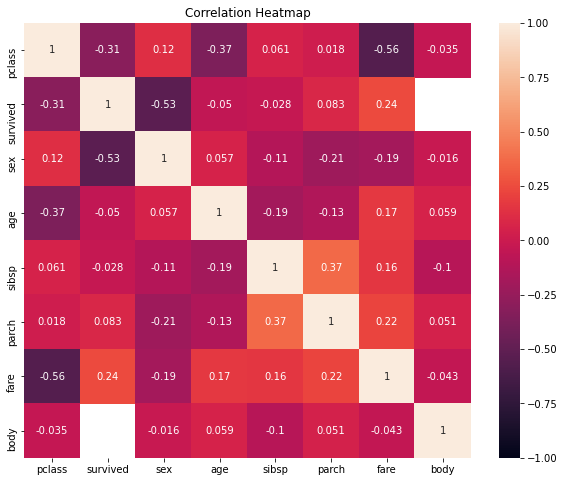

In [42]:
# Determining the corrolation between features.

plt.subplots(figsize=(10,8))

sns.heatmap(titanic.corr() , vmin=-1 , vmax=1,annot=True).set_title('Correlation Heatmap')


# Data Extraction

In [7]:

x=titanic.drop(['survived','name','sibsp','ticket','boat','embarked','body','home.dest','parch','cabin'], axis=1)# features
y=titanic['survived']# target

print('Data size: ',x.shape)
print(y.value_counts())
    
    

Data size:  (1309, 4)
0    809
1    500
Name: survived, dtype: int64


In [8]:
# splitting data
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.25, random_state=5)

print('Train size: ',x_train.shape)
print('Test size: ',x_test.shape)

Train size:  (981, 4)
Test size:  (328, 4)


# Part 1:DecisionTree

## Model 

In [9]:

# applaying tree algorithm
tree= DecisionTreeClassifier(random_state=0)# Estimator
tree.fit(x_train,y_train)# fitting our model 'tree'



DecisionTreeClassifier(random_state=0)

## Evaluation

In [10]:
# Evaluating our model
y_pred = tree.predict(x_test)
print('Accuracy:{} '.format(accuracy_score(y_test,y_pred)))

Accuracy:0.7408536585365854 


In [110]:
text_representation = tree.export_text(DecisionTreeClassifier(random_state=0).fit(x_train,y_train))
print(text_representation)

|--- feature_1 <= 0.50
|   |--- feature_0 <= 2.50
|   |   |--- feature_3 <= 31.68
|   |   |   |--- feature_2 <= 56.00
|   |   |   |   |--- feature_3 <= 30.84
|   |   |   |   |   |--- feature_3 <= 12.82
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_3 >  12.82
|   |   |   |   |   |   |--- feature_3 <= 22.00
|   |   |   |   |   |   |   |--- feature_3 <= 20.25
|   |   |   |   |   |   |   |   |--- feature_3 <= 13.25
|   |   |   |   |   |   |   |   |   |--- feature_2 <= 18.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- feature_2 >  18.50
|   |   |   |   |   |   |   |   |   |   |--- feature_2 <= 37.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |   |--- feature_2 >  37.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |--- feature_3 >  13.25
|   |   |   |   |   |   |   |   |   |--- class: 

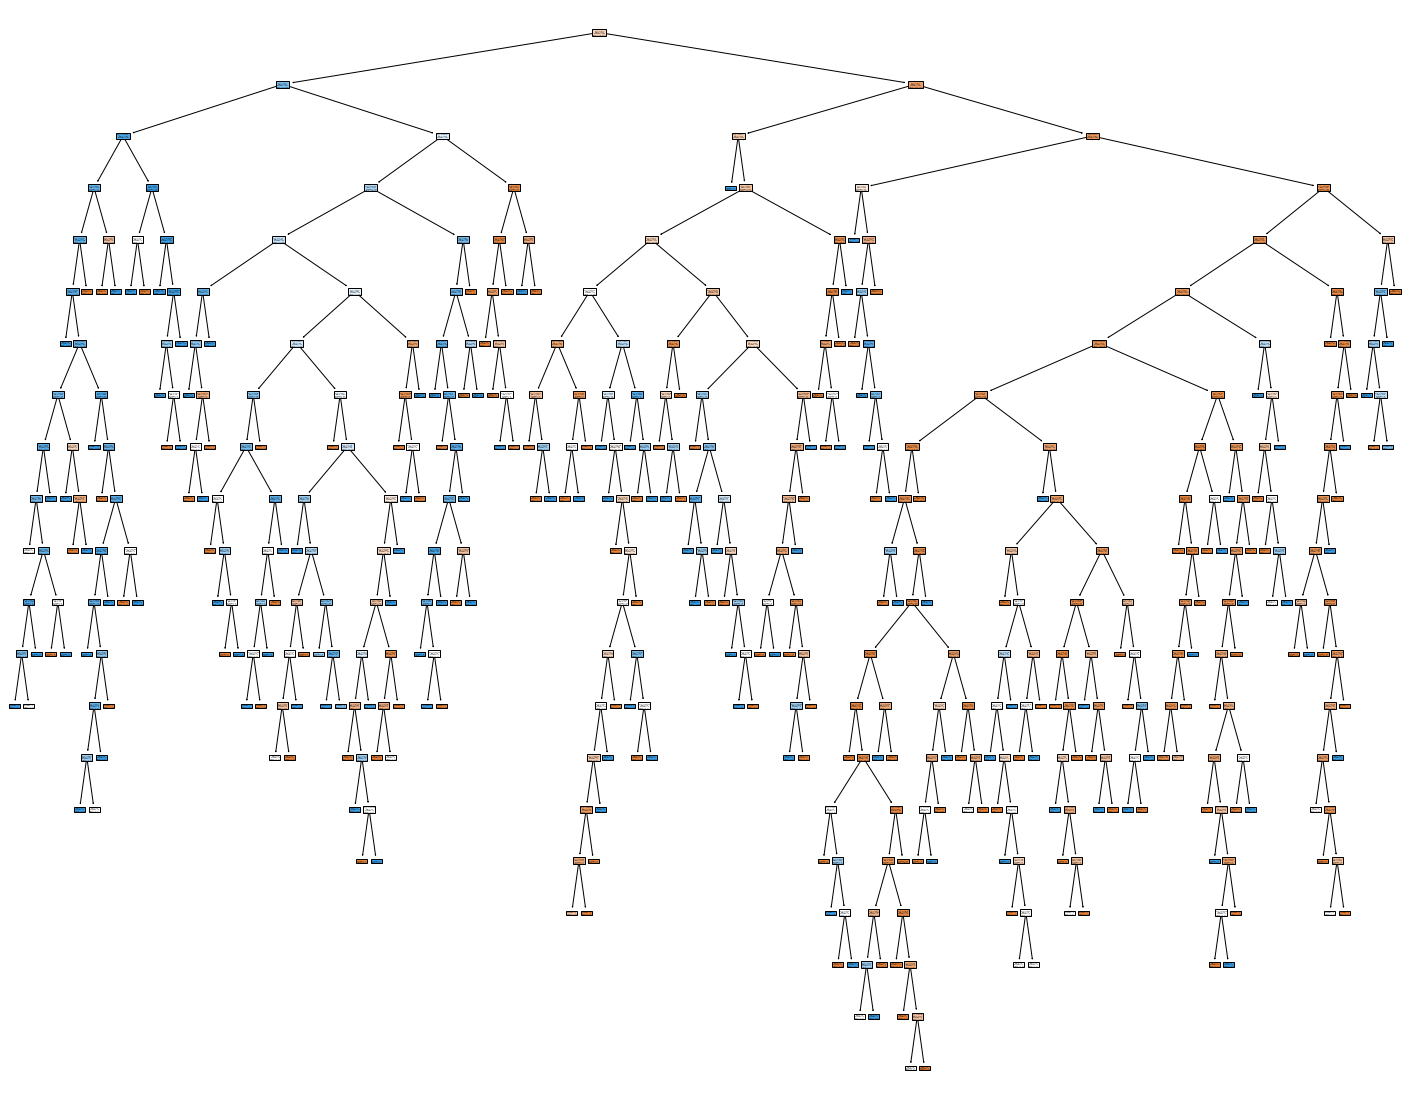

In [114]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(DecisionTreeClassifier(random_state=0).fit(x_train,y_train), 
                 
                   filled=True)

## Change the decision tree parameters

In [14]:
# applaying tree algorithm
tree= DecisionTreeClassifier(random_state=5 , criterion = "entropy",max_depth=5,min_samples_split = 10 )# Estimator
tree.fit(x_train,y_train)# fitting our model 'tree'

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=10,
                       random_state=5)

In [15]:
# Evaluating our model
y_pred = tree.predict(x_test)
print('Accuracy:{} '.format(accuracy_score(y_test,y_pred)))

Accuracy:0.7926829268292683 


en réglant les hyperparamètres de notre model en peut  avoir une meilleure performance.

on peut jouer avec ces hyperparamètres pour peut-être avoir encore une meilleure performance. 

on peut tt simplement  utiliser 'GridSearchCV'  qui nous permet de trouver le model avec les meilleurs hyperparamètres en comparant les différentes perfermance de chaque combinaison grâce à la technique 'Cross Validation'.


on va utiliser GridSearchCV avec  Random Forest algorithm par la suite. 


# Part 2: Random Forest 

## Model

In [17]:
# estimator
random_forest = RandomForestClassifier(n_estimators=10)
random_forest .fit(x_train,y_train)

RandomForestClassifier(n_estimators=10)

## Evaluation

In [19]:
# Evaluation
y_pred = random_forest.predict(x_test)
print('Accuracy:{}'.format(accuracy_score(y_test, y_pred)))

Accuracy:0.7591463414634146


## Change the decision tree parameters using 'GridSearchCV'

In [25]:
param_grid={'n_estimators':np.arange(1,20)}

grid = GridSearchCV(RandomForestClassifier(),param_grid , cv =5 )
grid.fit(x_train , y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [26]:
grid.best_params_

{'n_estimators': 14}

In [27]:
grid.best_score_

0.8022480058013054

In [38]:
model =grid.best_estimator_
model.predict_proba(np.array([[2,0,27,200]])) 

array([[0.14285714, 0.85714286]])

pclass = 2 , sex = male (0) , age=27 and fare = 200 --> we have an  85% chance of surviving  

We can try to adjust other hyperparameters as max_depth(max number of levels in each decision tree) or min_samples_leaf ( min number of data points allowed in a leaf node ) to have  even better performance.